# traycer demo

Scanlines rendered: 100%|██████████| 337/337 [01:01<00:00,  5.50it/s]


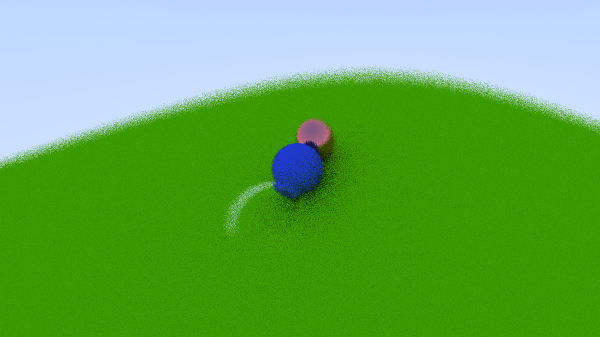

In [2]:
import traycer
from PIL import Image
from tqdm import tqdm

# filename
fname = "test.ppm"

# materials
material_ground = traycer.lambertain(traycer.color(0.4,0.8,0.0))
material_center = traycer.lambertain(traycer.color(0.2,0.3,0.8))
material_left   = traycer.metal(traycer.color(0.8,0.8,0.8), fuzz=1.0)
material_right  = traycer.metal(traycer.color(1.0,0.5,0.5), fuzz=0.00)
material_glass  = traycer.dielectric(theta=1.1)

# world
world = traycer.hittable_list()
world.add(traycer.sphere(traycer.point3( 0.0, -100.5, -1.0), 100.0, material_ground))
#world.add(traycer.sphere(traycer.point3( 0.0,    0.0, -1.0), 0.5, material_center))
world.add(traycer.sphere(traycer.point3( 0.0,    0.0, -1.0), 0.5, material_center))
world.add(traycer.sphere(traycer.point3(-1.0,    0.0, -1.0), -0.5, material_glass))
world.add(traycer.sphere(traycer.point3( 1.0,    0.0, -1.0), 0.5, material_right))

cam = traycer.camera(image_width=600, lookfrom=traycer.point3(-2,2,1),
                     lookat=traycer.point3(0,0,-1), 
                     vup=traycer.vec3(0,1,0), vfov=100, defocus_angle=10.0,
                     focus_dist=3.4)
image = cam.render(world, aa=10, max_depth=10)
image.write(fname)
display(Image.open(fname))
